# Classifier for Intel Images

There are three classificators for Intel Images dataset:
- Random Forest
- Feed-Forward Neural Network
- Convolutional Neural Network

Dataset link: https://drive.google.com/file/d/1xEwPYoiY8wsyF33LCTrRhDywbfC82f-g/view?usp=sharing

1. Lets load all the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

from abc import ABC, abstractmethod

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Flatten, Dense, Reshape
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


2. Extract and prepare data from the dataset

In [4]:
dataset_path = "Intel Image Classification/seg_train/seg_train"

image_size = (224, 224)  

resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def extract_features(image_path, model):
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = preprocess_input(image_array)
    features = model.predict(image_array)
    return features.flatten()

X = []
y = []
class_labels = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

for label, class_name in enumerate(class_labels):
    class_folder = os.path.join(dataset_path, class_name)
    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)
        if not image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue
        try:
            features = extract_features(image_path, resnet_model)
            X.append(features)
            y.append(label)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")

if len(X) == 0 or len(y) == 0:
    raise ValueError("No valid images found in the dataset. Please check the dataset path and contents.")

X = np.array(X)
y = np.array(y)

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━

## Mnist Classifier Interface and classes

1. Create MnistClassifierInterface

In [11]:
class MnistClassifierInterface(ABC):
    @abstractmethod
    def train(self, X_train: np.ndarray, y_train: np.ndarray) -> None:
        pass
    
    @abstractmethod
    def predict(self, X: np.ndarray) -> np.ndarray:
        pass

2. Create Random forest classifier class

In [12]:
class RandomForestMnistClassifier(MnistClassifierInterface):
    def __init__(self):
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        
    def train(self, x_train, y_train):
        x_train_flat = x_train.reshape(x_train.shape[0], -1)
            
        return self.model.fit(x_train_flat, y_train)
    
    def predict(self, x_val):
        X_val_flat = x_val.reshape(x_val.shape[0], -1)

        return self.model.predict(X_val_flat)

3. Create Neural Network Classifier class

In [13]:
class NeuralNetworkMnistClassifier(MnistClassifierInterface):
    def __init__(self):
        self.model = Sequential([
            Dense(512, activation='relu', input_shape=(x_train.shape[1],)),
            Dropout(0.1),
            Dense(256, activation='relu'),
            Dropout(0.1),
            Dense(len(class_labels), activation='softmax')
        ])
        
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
    def train(self, x_train, y_train):
        return self.model.fit(x_train, y_train, epochs=10, batch_size=32)
    
    def predict(self, x_val):
        return np.argmax(self.model.predict(x_val), axis=-1)

4. Create Convolution Neural Network classifier class

In [14]:
class CNNMnistClassifier(MnistClassifierInterface):
    def __init__(self):
        self.model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 2)),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dense(10, activation='softmax')
        ])
        
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
    def train(self, x_train, y_train):
        return self.model.fit(x_train, y_train, epochs=10, batch_size=32)
    
    def predict(self, x_val):
        return np.argmax(self.model.predict(x_val), axis=-1)

5. Create Mnist classifier Class

In [15]:
class MnistClassifier:    
    def __init__(self, algorithm='rf'):

        self.algorithm = algorithm.lower()
        
        if self.algorithm == 'rf':
            self.classifier = RandomForestMnistClassifier()
        elif self.algorithm == 'nn':
            self.classifier = NeuralNetworkMnistClassifier()
        elif self.algorithm == 'cnn':
            self.classifier = CNNMnistClassifier()
        else:
            raise ValueError("Invalid algorithm. Choose from: 'rf', 'nn', or 'cnn'.")
        
    def train(self, X_train, y_train):
        self.classifier.train(X_train, y_train)
        
    def predict(self, X):
        return self.classifier.predict(X)

## Model training and predictions

1. Visualize some examples from dataset

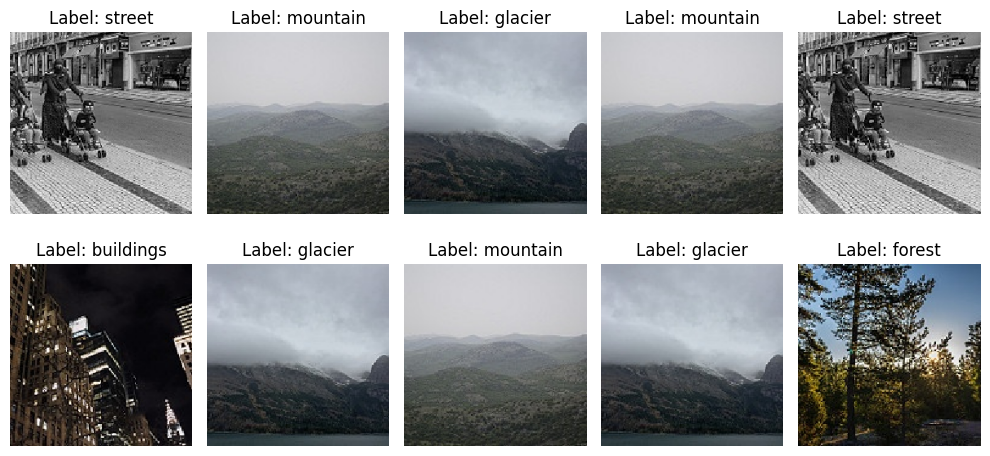

In [23]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    class_folder = os.path.join(dataset_path, class_labels[y_train[i]])
    image_names = [img for img in os.listdir(class_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    original_image_path = os.path.join(class_folder, image_names[0])
    original_image = load_img(original_image_path, target_size=image_size)
    plt.imshow(original_image)
    plt.title(f"Label: {class_labels[y_train[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Random Forest Classifier

Train the model and make predictions.

In [24]:
X_train_flat = x_train.reshape(x_train.shape[0], -1)
X_val_flat = x_val.reshape(x_val.shape[0], -1)

rf_classifier = MnistClassifier(algorithm='rf')

rf_classifier.train(X_train_flat, y_train)

y_val_pred_rf = rf_classifier.predict(X_val_flat)

Generate Classification report

In [25]:
rf_accuracy = accuracy_score(y_val, y_val_pred_rf)
print(f"Random Forest validation accuracy: {rf_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_rf))

Random Forest validation accuracy: 0.9145

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       462
           1       0.93      0.93      0.93       460
           2       0.82      0.85      0.84       455
           3       0.93      0.95      0.94       484
           4       0.88      0.84      0.86       538
           5       0.94      0.94      0.94       408

    accuracy                           0.91      2807
   macro avg       0.92      0.92      0.92      2807
weighted avg       0.91      0.91      0.91      2807



### Neural Network Classifier

Train the model and make predictions:

In [26]:
nn_classifier = MnistClassifier(algorithm='nn')

nn_classifier.train(x_train, y_train)
y_val_pred_nn = nn_classifier.predict(x_val)

Epoch 1/10


/Users/denisbodnar/.pyenv/versions/3.10.16/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8576 - loss: 0.3987
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9344 - loss: 0.1878
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9390 - loss: 0.1648
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9499 - loss: 0.1349
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9604 - loss: 0.1101
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9656 - loss: 0.0961
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9640 - loss: 0.0939
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9701 - loss: 0.0759
Epoch 9/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9763 - loss: 0.0622
Epoch 10/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9795 - loss: 0.0569
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


Create classification report

In [27]:

nn_accuracy = accuracy_score(y_val, y_val_pred_nn)
print(f"Neural Network validation accuracy: {nn_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_nn))

Neural Network validation accuracy: 0.9287

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       462
           1       0.96      0.93      0.95       460
           2       0.86      0.87      0.87       455
           3       0.93      0.96      0.95       484
           4       0.91      0.88      0.89       538
           5       0.93      0.97      0.95       408

    accuracy                           0.93      2807
   macro avg       0.93      0.93      0.93      2807
weighted avg       0.93      0.93      0.93      2807



### Convolutional Neural Network Classifier

Train the model and make predictions

In [28]:
cnn_classifier = MnistClassifier(algorithm='cnn')

x_train_reshaped = x_train.reshape(x_train.shape[0], 32, 32, 2)

cnn_classifier.train(x_train_reshaped, y_train)

x_val_reshaped = x_val.reshape(x_val.shape[0], 32, 32, 2)
y_val_pred_cnn = cnn_classifier.predict(x_val_reshaped)

Epoch 1/10


/Users/denisbodnar/.pyenv/versions/3.10.16/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8267 - loss: 0.5017
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9237 - loss: 0.2108
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9356 - loss: 0.1839
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9491 - loss: 0.1442
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9580 - loss: 0.1216
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9623 - loss: 0.1045
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9689 - loss: 0.0874
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9730 - loss: 0.0702
Epoch 9/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9806 - loss: 0.0544
Epoch 10/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9839 - loss: 0.0489
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Generate accuracy report

In [29]:
cnn_accuracy = accuracy_score(y_val, y_val_pred_cnn)
print(f"Convolutional Network validation accuracy: {cnn_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_cnn))

Convolutional Network validation accuracy: 0.9124

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       462
           1       0.91      0.95      0.93       460
           2       0.83      0.84      0.84       455
           3       0.94      0.93      0.93       484
           4       0.85      0.88      0.87       538
           5       0.96      0.91      0.93       408

    accuracy                           0.91      2807
   macro avg       0.92      0.91      0.91      2807
weighted avg       0.91      0.91      0.91      2807



## Predictions visualization and comparison

Build the comparison chart with example results

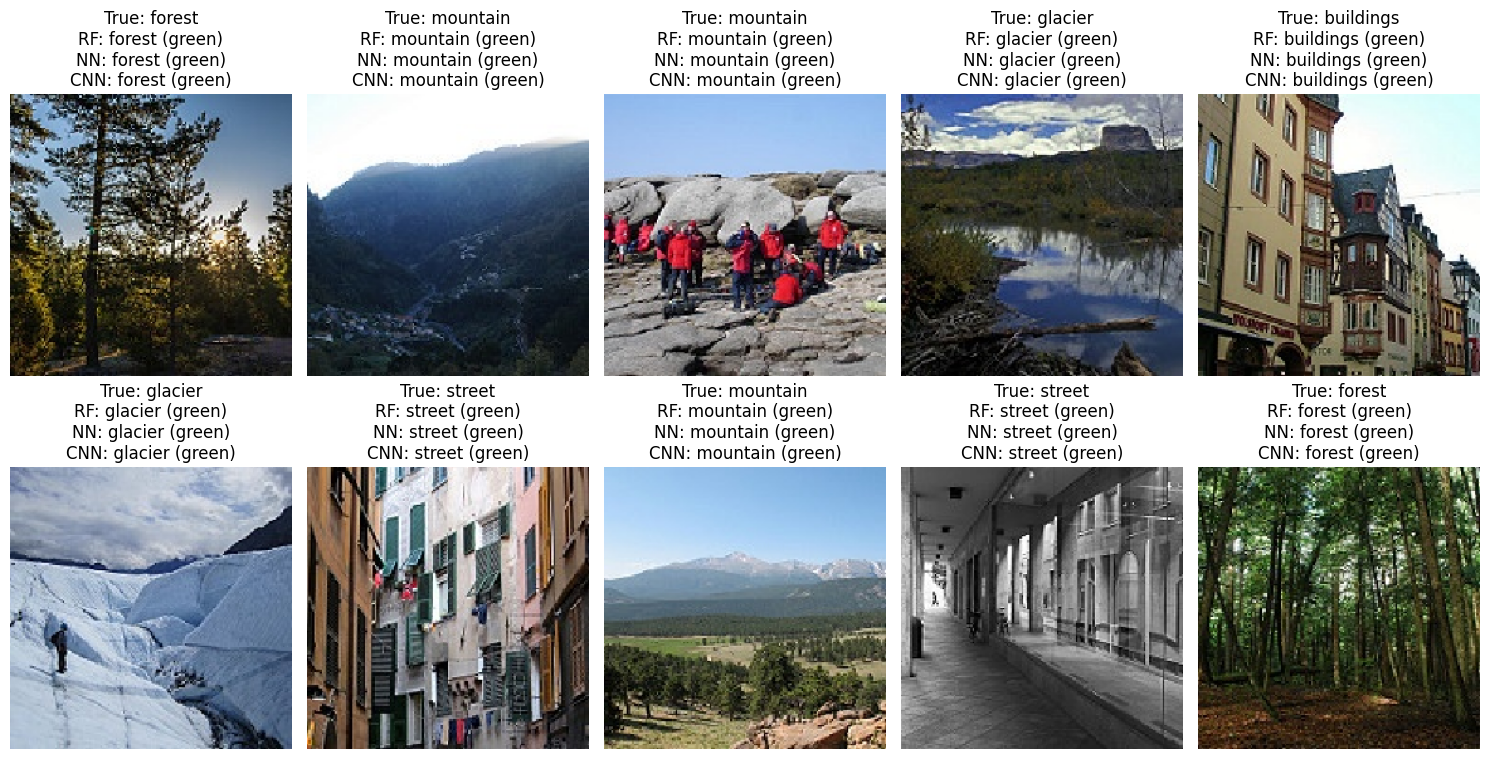

In [32]:
n_examples = 10
example_indices = np.random.choice(len(x_val), n_examples, replace=False)

example_images = x_val[example_indices]
true_labels = y_val[example_indices]
rf_preds = y_val_pred_rf[example_indices]
nn_preds = y_val_pred_nn[example_indices]
cnn_preds = y_val_pred_cnn[example_indices]

plt.figure(figsize=(15, 8))
for i in range(n_examples):
    plt.subplot(2, 5, i + 1)
    class_folder = os.path.join(dataset_path, class_labels[true_labels[i]])
    
    image_names = [img for img in os.listdir(class_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    if i < len(image_names):
        original_image_path = os.path.join(class_folder, image_names[i])
    else:
        original_image_path = None
    
    if os.path.exists(original_image_path):
        original_image = load_img(original_image_path, target_size=image_size)
        plt.imshow(original_image)
    else:
        print(f"File not found: {original_image_path}")
        plt.imshow(np.zeros(image_size)) 
    
    rf_color = 'green' if rf_preds[i] == true_labels[i] else 'red'
    nn_color = 'green' if nn_preds[i] == true_labels[i] else 'red'
    cnn_color = 'green' if cnn_preds[i] == true_labels[i] else 'red'
    
    plt.title(f"True: {class_labels[true_labels[i]]}\nRF: {class_labels[rf_preds[i]]} ({rf_color})\nNN: {class_labels[nn_preds[i]]} ({nn_color})\nCNN: {class_labels[cnn_preds[i]]} ({cnn_color})",
              fontdict={'color': 'black'})
    plt.axis('off')
    
plt.tight_layout()
plt.show()